# Tour & Travels Customer Churn Prediction
Predict Tour & Travels Customer Churn

---

# 개요
A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.

Help Build Predictive Models And Save The Company's Money.

Perform Fascinating EDAs.

The Data Was Used For Practice Purposes And Also During A Mini Hackathon, Its Completely Free To Use

여행 및 여행 회사는 아래에 제공된 지표를 기반으로 고객이 이탈할지 여부를 예측하려고 합니다.

예측 모델을 구축하고 회사의 비용을 절약할 수 있습니다.

---

## 데이터 설명
Age	: 나이

FrequentFlyer : 고객이 항공편을 자주 이용하는지 여부

AnnualIncomeClass : 사용자의 연간 소득 등급

ServicesOpted : 최근 몇 년 동안 서비스를 선택한 횟수

AccountSyncedToSocialMedia : 사용자의 회사 계정이 소셜 미디어에 동기화되었는지 여부

BookedHotelOrNot : 고객이 회사 서비스를 이용하여 숙박/호텔을 예약하는지 여부

Target : 1- 고객 이탈 0- 고객 이탈 안 함


## 출처
*https://www.kaggle.com/tejashvi14/tour-travels-customer-churn-prediction*

---

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [49]:
df = pd.read_csv('Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [50]:
# 결측치 확인
df.isnull().sum() 
# 결측치 x

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

## EDA

In [51]:
colname = ['Age',	'FrequentFlyer',	'AnnualIncomeClass',	'ServicesOpted',	'AccountSyncedToSocialMedia',	'BookedHotelOrNot',	'Target']


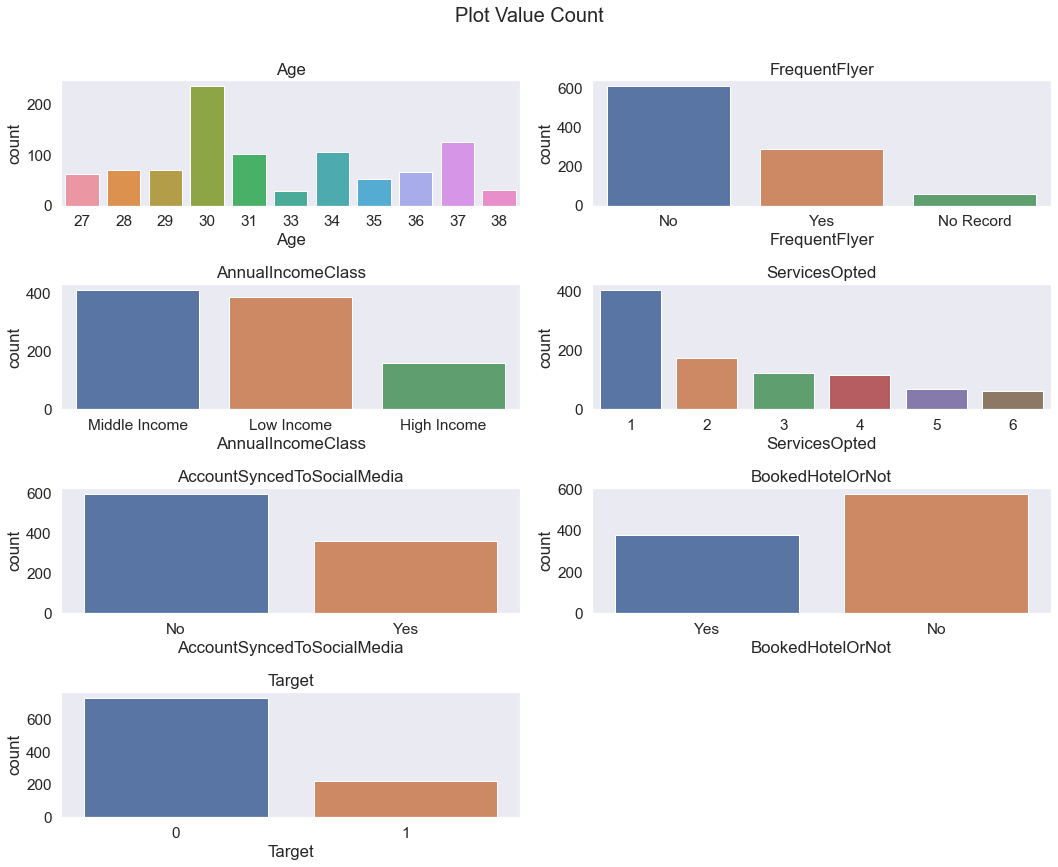

In [52]:
plt.figure(figsize=(15,20))
for i,column in enumerate(colname):
    plt.subplot(len(colname), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

회사서비스로 호텔 체크인 안하는 비율이 높음

소셜미디어에 동기화 잘 안함

중간소득 > 저소득 > 고소득순으로 분포를 띄는 모양

항공서비스를 자주이용 안하는 고객이 많기는함

나이는 다양하게 분포되어있지만 30대인사람이 더 많아서 20 / 30대로 분류하기는 어려워보임

In [53]:
# 2개의 카테고리를 갖는 데이터는 replace를 사용하여 0,1로 변환 
df = df.replace(['No','Yes'],[0,1])
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,0,1,0
1,34,1,Low Income,5,1,0,1
2,37,0,Middle Income,3,1,0,0
3,30,0,Middle Income,2,0,0,0
4,30,0,Low Income,1,0,0,0


더미만들기

In [81]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FrequentFlyer_1,FrequentFlyer_No Record,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,0,0,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,1,0,0,0,0,0,1
3,30,2,0,0,0,0,0,0,1
4,30,1,0,0,0,0,0,1,0


In [55]:
x = df.drop(columns = ['Target'])

In [56]:
y = df['Target']

### DecisionTree

In [57]:
from sklearn.model_selection import train_test_split # train, test 세트의 비율을 8:2로 조정

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 모델 class를 가져 옵니다.
model = DecisionTreeClassifier()

# fit 함수를 사용하여 데이터를 학습합니다.
model.fit(x_train, y_train)

# score 함수를 사용하여 모델의 성능을 출력합니다.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9580602883355177
0.8481675392670157


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


models = []
models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기 
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.816514, test score : 0.832461
LDA - train_score : 0.825688, test score : 0.842932
KNN - train_score : 0.897772, test score : 0.848168
NB - train_score : 0.771953, test score : 0.774869
RF - train_score : 0.958060, test score : 0.842932
SVM - train_score : 0.872870, test score : 0.842932
[17:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB - train_score : 0.955439, test score : 0.853403


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 성능 비교에 필요한 모델 파라미터들을 정의합니다.
parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2']}

# 5개의 fold를 구성합니다.
cv = KFold(n_splits=5)
# 의사결정트리 모델을 튜닝하기 위하여 선언합니다.
DT = DecisionTreeClassifier()

# 모델 튜닝을 우해서 GridSearchCV를 사용합니다.
DT_CV = GridSearchCV(DT, parameters, scoring = 'accuracy', cv = cv, n_jobs= -1)
# 학습을 수행합니다.
DT_CV.fit(x_train, y_train)

# 결과를 출력합니다.
print(DT_CV.score(x_train, y_train))
print(DT_CV.score(x_test, y_test))

0.8479685452162516
0.8324607329842932


In [61]:
DT_CV.best_params_

# {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}

In [62]:
# 가장 성능이 좋았던 파라미터로 수행한 모델을 저장합니다.
best_DT_CV = DT_CV.best_estimator_

# 가장 좋은 성능을 보여준 모델의 결과를 출력합니다.
best_DT_CV.score(x_test, y_test)

0.8324607329842932

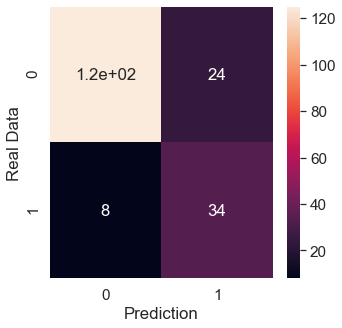

array([[125,  24],
       [  8,  34]], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix

model_predition = best_DT_CV.predict(x_test)

cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real Data')
plt.show()
cm

In [64]:
import sklearn.metrics as mt

print("accuracy score: {}".format(mt.accuracy_score(y_test, model_predition)))
print("recall_score: {}".format(mt.recall_score(y_test, model_predition)))
print("Precision score: {}".format(mt.precision_score(y_test, model_predition)))

# accuracy score: 0.837696335078534
# recall_score: 0.5
# Precision score: 0.6774193548387096

accuracy score: 0.8324607329842932
recall_score: 0.8095238095238095
Precision score: 0.5862068965517241


In [33]:
for i in range(20): 
    prediction = best_DT_CV.predict(x_test[i].reshape(1,-1))
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
2 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
4 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 1
5 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
6 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
7 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
8 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
9 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
10 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
11 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
12 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
13 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
14 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
15 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 0
16 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
17 번째 테스트 데이터의 예측 결과: 1, 실제 데이터: 1
18 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 1
19 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [70]:
y_resampled = pd.DataFrame(y)
y_resampled.head()

,Target
0,0
1,1
2,0
3,0
4,0


In [72]:
y_resampled.Target.replace(1, '이탈고객', inplace = True)
y_resampled.Target.replace(0, '이탈고객X', inplace = True)
# 알아보기 쉽게 변환하는 과정

In [73]:
y_resampled.head()

,Target
0,이탈고객X
1,이탈고객
2,이탈고객X
3,이탈고객X
4,이탈고객X


[Text(2993.8846153846152, 5047.714285714285, 'AnnualIncomeClass_Middle Income <= 0.5\nentropy = 0.793\nsamples = 763\nvalue = [581, 182]\nclass = 이탈고객X'),
 Text(1480.8461538461538, 4271.142857142857, 'AccountSyncedToSocialMedia <= 0.5\nentropy = 0.943\nsamples = 436\nvalue = [279, 157]\nclass = 이탈고객X'),
 Text(686.7692307692307, 3494.5714285714284, 'BookedHotelOrNot <= 0.5\nentropy = 0.895\nsamples = 257\nvalue = [177, 80]\nclass = 이탈고객X'),
 Text(429.23076923076917, 2718.0, 'FrequentFlyer_No Record <= 0.5\nentropy = 0.918\nsamples = 171\nvalue = [114, 57]\nclass = 이탈고객X'),
 Text(343.38461538461536, 1941.4285714285716, 'AnnualIncomeClass_Low Income <= 0.5\nentropy = 0.92\nsamples = 170\nvalue = [113, 57]\nclass = 이탈고객X'),
 Text(171.69230769230768, 1164.8571428571431, 'ServicesOpted <= 4.5\nentropy = 0.983\nsamples = 78\nvalue = [33, 45]\nclass = 이탈고객'),
 Text(85.84615384615384, 388.2857142857147, 'entropy = 0.98\nsamples = 72\nvalue = [30, 42]\nclass = 이탈고객'),
 Text(257.53846153846155, 3

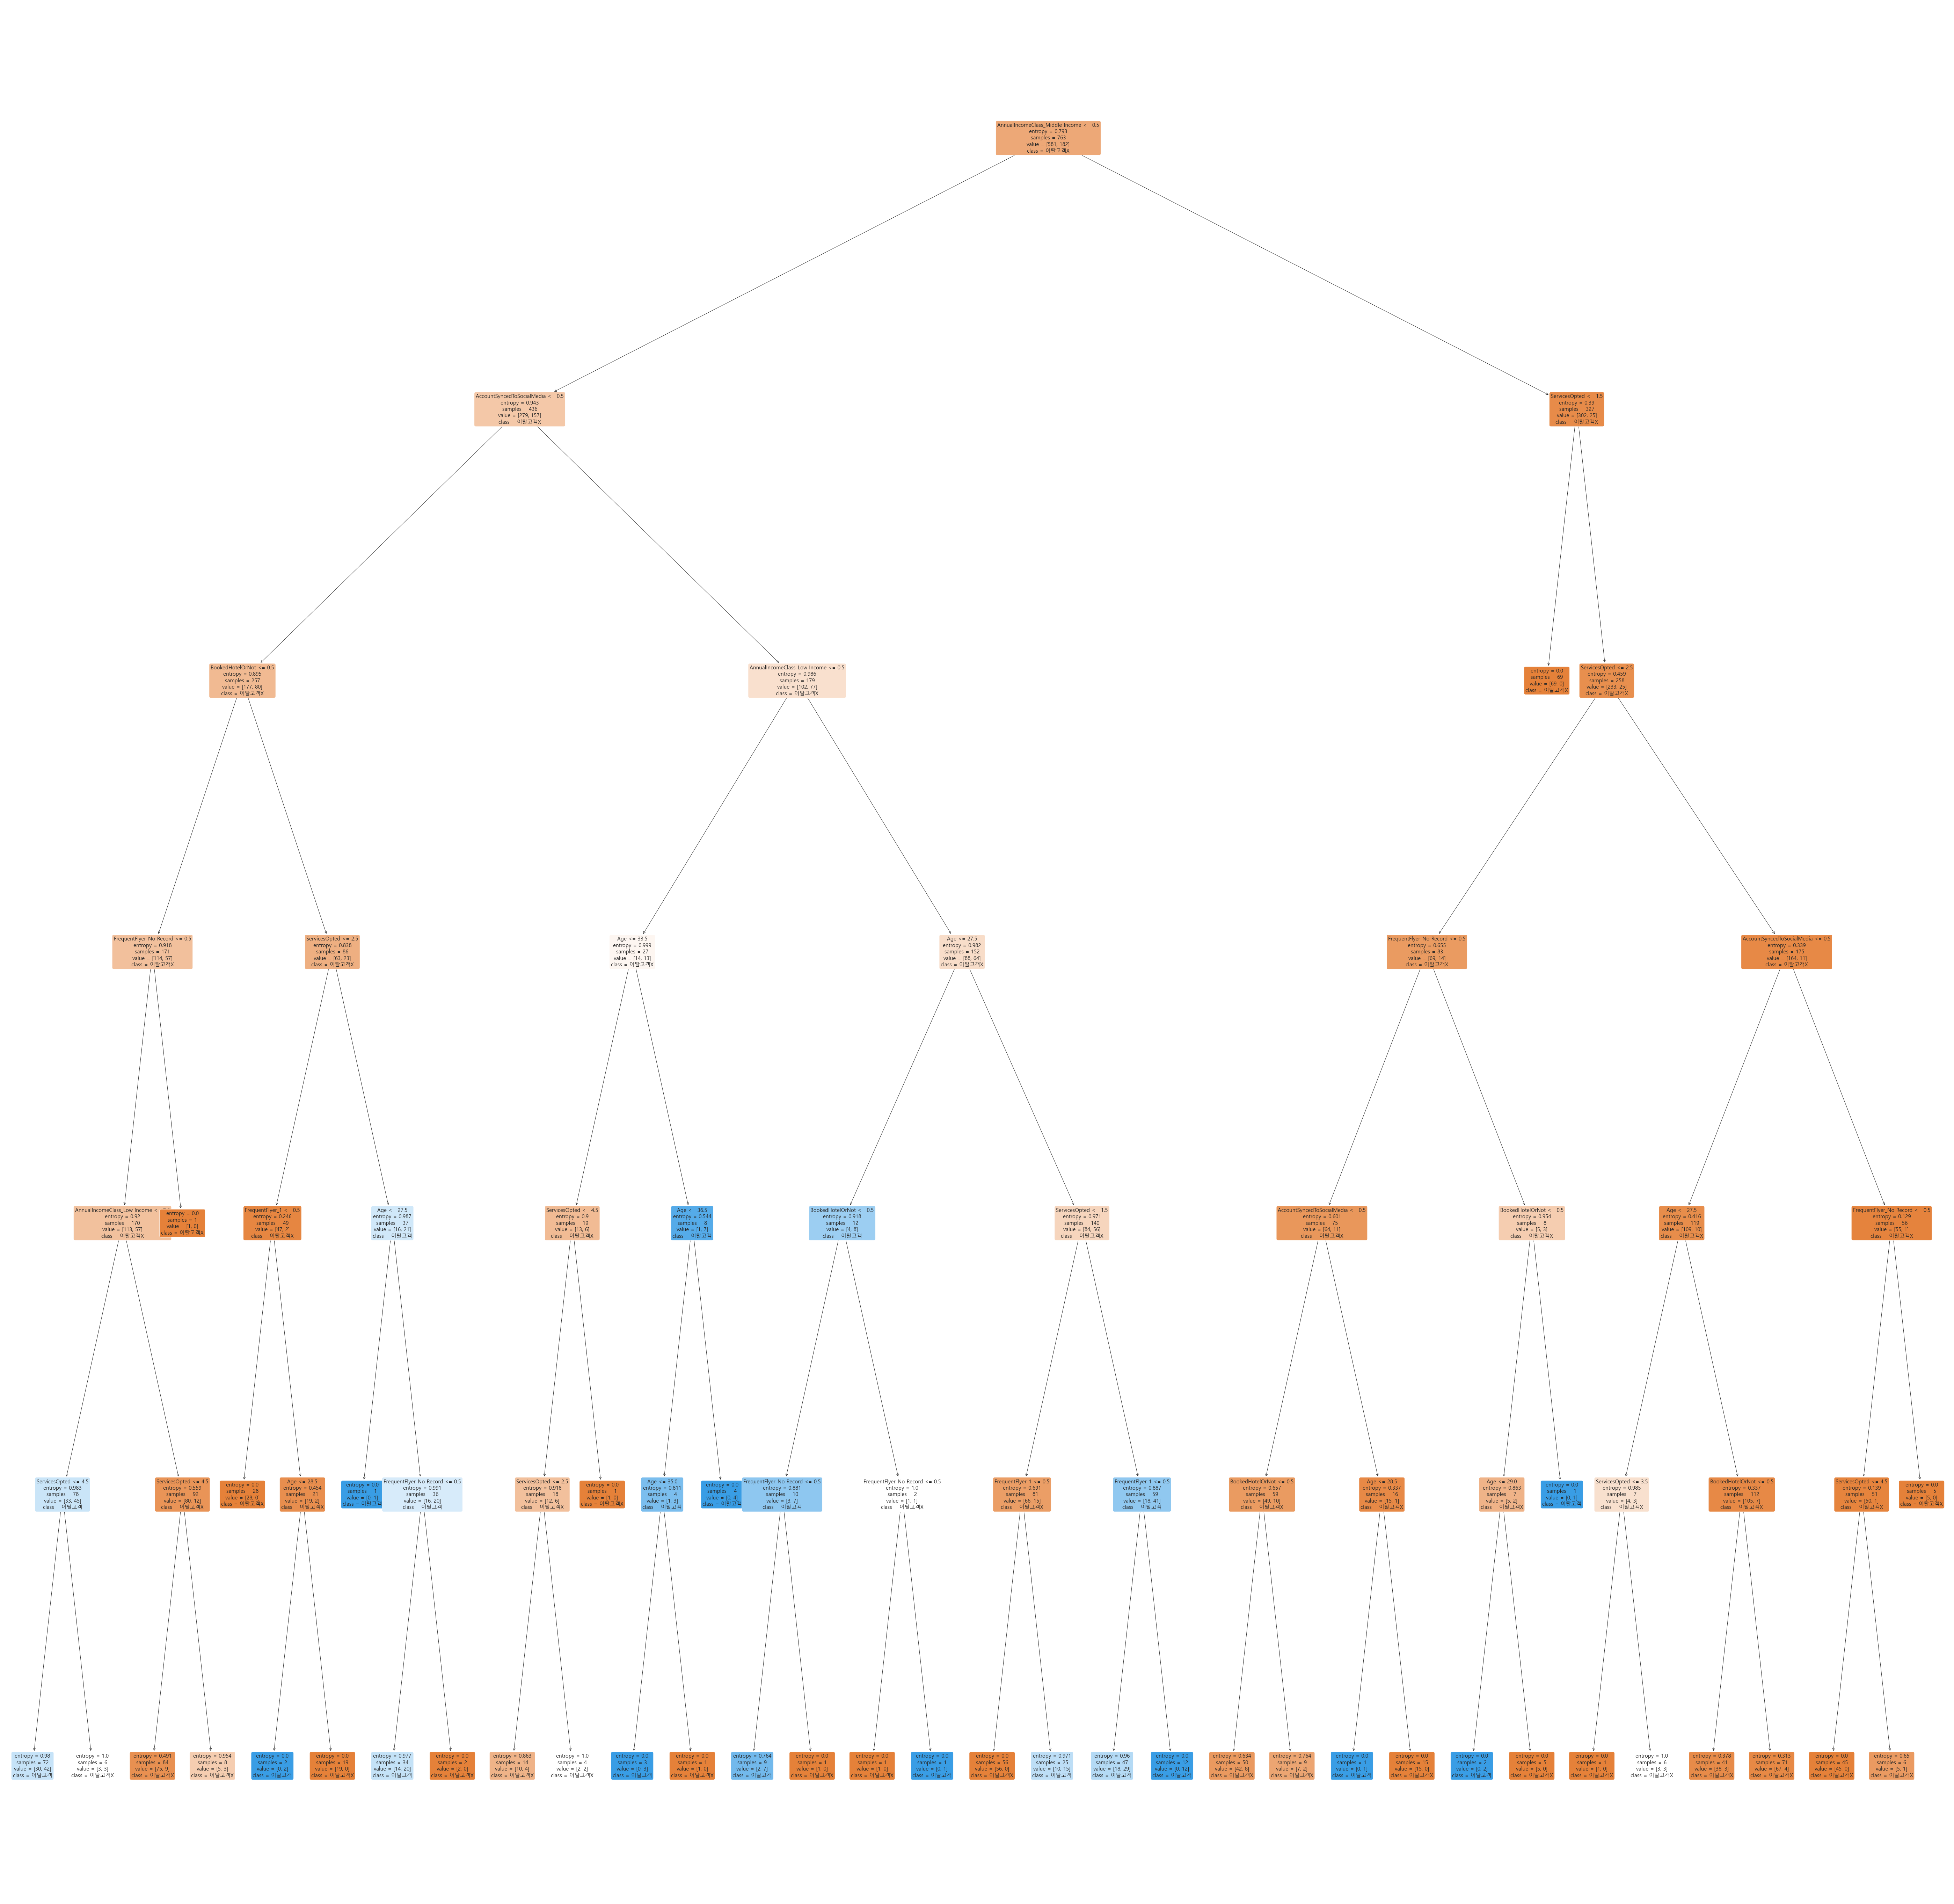

In [74]:
plt.figure(figsize=(100,100))

from sklearn.tree import plot_tree # tree diagram
plt.rcParams['font.family'] = 'Malgun Gothic'

feature_names = x.columns[:,]
target_names = y_resampled['Target'].unique().tolist()

plot_tree(best_DT_CV, 
          fontsize= 15,
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
